# K-Nearest Neighbors (K-NN)

## Introduction

The K-Nearest Neighbors (KNN) algorithm is a simple yet powerful machine learning technique that belongs to the family of instance-based, lazy learning algorithms. It is used for both classification and regression tasks, but it is more widely used in classification problems.

KNN operates on a very straightforward principle: it predicts the label of a new point based on the majority labels of its nearest neighbors.

KNN makes no assumptions about the underlying data distribution, which is advantageous with real-world data that often deviates from theoretical assumptions.

KNN does not build a model using the training data before receiving test data. Instead, it memorizes the training dataset, and computational work happens at the time of prediction, making it computationally expensive and slow with large datasets.

KNN can handle both classification and regression tasks effectively.

## Applications

KNN has a broad range of applications including but not limited to:

Recommendation Systems: Predicting user preferences by finding similar users or items based on features like browsing history or purchase behavior.

Medical Diagnosis: Classifying patient diagnoses based on similarity to historical patient data.

Financial Services: Credit scoring by comparing clients' profiles with historical data to determine creditworthiness.

## Algorithm Process
1. **Load Data**: Prepare the training and test datasets.
2. **Choose K and Distance Metric**: Select the number of neighbors and the metric for measuring distance.
3. **Find Neighbors**: For each test instance, locate the K nearest neighbors in the training dataset.
4. **Decision Making**: Predict the output based on majority voting or averaging.
5. **Output Prediction**: Return the prediction for the test instance.

## Data Process

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/Users/kevinwang/Downloads/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

## Training the K-NN model on the Training set

In [9]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [10]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)
predictions=model.predict(X_test

## Making the Confusion Matrix to compare both models

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

[[64  4]
 [ 3 29]]
[[64  4]
 [ 3 29]]


0.93

## Visualising the Test set results 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


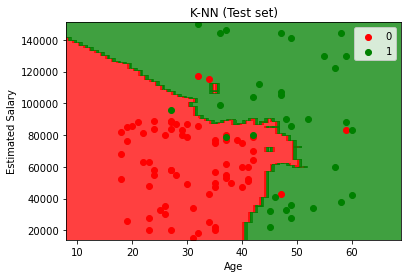

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The boundary between the red and green areas shows the decision boundary determined by K-NN. The jagged nature of the boundary indicates the local decision-making process inherent in K-NN, where the classification at each point is influenced by the nearest neighbors.

There appears to be a trend where younger individuals with lower salaries are classified as class 0 (red), while older individuals with higher salaries tend to be classified as class 1 (green). However, there are exceptions, particularly in the transition area, which highlights the influence of the nearest neighbor approach.
Misclassifications: Points that are colored differently from their background (e.g., red squares in the green region or green circles in the red region) indicate misclassifications by the model on the test data.

## Conclusion
By assessing the regions and how well they align with the data points' actual classes, you can infer the model's accuracy and areas where it may not perform well.

The plot suggests how 'Age' and 'Estimated Salary' affect the likelihood of belonging to one class or another, guiding further feature analysis or feature engineering to improve model performance.

This visual analysis can help in understanding the effectiveness of the K-NN model in classifying new data and determining areas where the model might be improved, either by tuning the number of neighbors (K) or considering different features.